# Do students who take more than one camp want non-duplicate themes?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

<Figure size 1332x756 with 0 Axes>

In [2]:
# load student data but only keep certain columns
df = pd.read_excel(r'C:\Users\joseph\Documents\Camp_data\istar_camper_data.xlsx', engine='openpyxl')
df = df[['Year','studentid','FLName','Theme','Class']]

In [3]:
# camper is defined as a student enrolled in a given year; e.g. Sam Smith enrolling in 2018 and 2019 counts as 2 "campers"
count = df['studentid'].nunique()
print(f'{count} total campers')

# studentid and total registrations, with count of unique themes
df2 = df.groupby(['studentid']).agg({'Class':'count','Theme':'nunique'})
df2.describe()

23529 total campers


,Class,Theme
count,23529.000000,23529.000000
mean,1.073909,1.043521
std,0.270730,0.205897
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,4.000000,3.000000


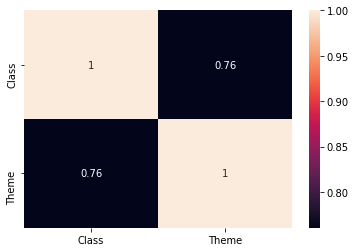

In [4]:
corrMatrix = df2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [5]:
def multicampers_annual(year, data):
        campers = data[data['Year']==year] # get only the specified year
        #campers = campers[campers['Theme'] != 'Other'] # get only day campers
        campers = campers.groupby(['studentid']).agg({'Class':'count','Theme':'nunique'}) # count total camps and distinct count themes
        multis = campers[campers['Class']>1]
        print(f'- {len(multis)} multiregistration campers, {round(len(multis)/len(campers)*100,1)}% of campers.')
        sensations = campers[campers['Theme']>1]
        print(f'- {len(sensations)} campers enrolled in more than one theme, {round(len(sensations)/len(multis)*100,1)}% of multi-campers.')
        majors = campers[campers['Class']>2]
        print(f'- (Fun fact: {len(majors)} campers enrolled in more than 2 camps!)')
        print(f'\n{round(len(sensations)/len(campers)*100,1)}% of {year} campers enrolled in multiple themes.')

def multicampers_all(data):
        campers = data[data['Year'] != 2011] # not 2011, since categorization was different then
        #campers = campers[campers['Theme'] != 'Other'] # get only day campers
        campers = campers.groupby(['studentid']).agg({'Class':'count','Theme':'nunique'}) # count total camps and distinct count themes
        multis = campers[campers['Class']>1]
        print(f'- {len(multis)} multiregistration campers, {round(len(multis)/len(campers)*100,1)}% of campers.')
        sensations = campers[campers['Theme']>1]
        print(f'- {len(sensations)} campers enrolled in more than one theme, {round(len(sensations)/len(multis)*100,1)}% of multi-campers.')
        majors = campers[campers['Class']>2]
        print(f'- (Fun fact: {len(majors)} campers enrolled in more than 2 camps!)')
        print(f'\n{round(len(sensations)/len(campers)*100,1)}% of campers enrolled in multiple themes.')

In [6]:
# multicampers_annual(df)
multicampers_all(df)

- 1464 multiregistration campers, 7.4% of campers.
- 1017 campers enrolled in more than one theme, 69.5% of multi-campers.
- (Fun fact: 32 campers enrolled in more than 2 camps!)

5.1% of campers enrolled in multiple themes.
